In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the LSTM model with more layers
model = Sequential()
model.add(LSTM(128, input_shape=(28, 28), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [2]:
# Train the model and record history
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
375/375 [==============================] - 80s 179ms/step - loss: 0.6337 - accuracy: 0.8007 - val_loss: 0.2178 - val_accuracy: 0.9396
Epoch 2/5
375/375 [==============================] - 66s 177ms/step - loss: 0.1764 - accuracy: 0.9497 - val_loss: 0.1278 - val_accuracy: 0.9641
Epoch 3/5
375/375 [==============================] - 67s 179ms/step - loss: 0.1150 - accuracy: 0.9673 - val_loss: 0.1040 - val_accuracy: 0.9710
Epoch 4/5
375/375 [==============================] - 66s 175ms/step - loss: 0.0866 - accuracy: 0.9744 - val_loss: 0.0793 - val_accuracy: 0.9783
Epoch 5/5
375/375 [==============================] - 76s 202ms/step - loss: 0.0682 - accuracy: 0.9798 - val_loss: 0.0771 - val_accuracy: 0.9772


In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 11s 34ms/step - loss: 0.0712 - accuracy: 0.9779
Test loss: 0.0712, Test accuracy: 0.9779


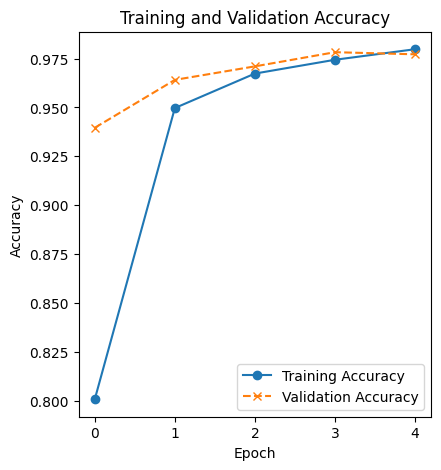

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


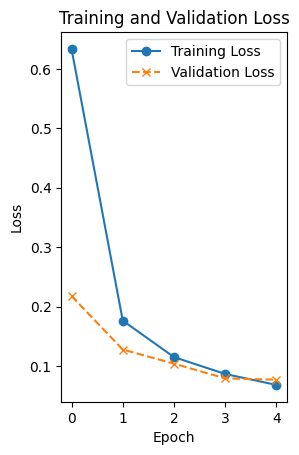

In [7]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [8]:

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>